In [1]:
from huggingface_hub import login

#login(HF_token)

In [ ]:
!pip install -U transformers accelerate peft bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
!pip install pycocoevalcap

import json
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 8.4 MB/s eta 0:00:00


In [ ]:
from peft import PeftModel, PeftConfig
from transformers import LlavaForConditionalGeneration, AutoProcessor, BitsAndBytesConfig, AutoModelForCausalLM, AutoModelForVision2Seq
import torch

model_id = "llava-hf/llava-1.5-7b-hf"

device = "cuda" if torch.cuda.is_available() else "cpu"

base_model = LlavaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
).to(device)

processor = AutoProcessor.from_pretrained(model_id)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

In [ ]:
conversation = [
    {
      "role": "user",
      "content": [
          {"type": "text", "text": "Describe briefly"},
          {"type": "image"},
        ],
    },
]

prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

In [ ]:
import requests
from PIL import Image

image_url = "https://llava-vl.github.io/static/images/view.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

In [ ]:
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

output = base_model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=False))

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


<s> USER: <image> 
Describe briefly ASSISTANT: The image features a pier extending out into a large body of water, likely a lake. The pier is made of wood and has a bench on it, providing a place for people to sit and enjoy the view. The water is calm, and the pier appears to be the only structure in the scene. The surrounding area is covered in trees, creating a serene and peaceful atmosphere.</s>


In [ ]:
!pip install datasets
import datasets
from sklearn.model_selection import train_test_split

ds = datasets.load_dataset("Naveengo/flickr8k", split='train')

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00


README.md:   0%|          | 0.00/539 [00:00<?, ?B/s]

(…)-00000-of-00003-942e07a3ce94e325.parquet:   0%|          | 0.00/373M [00:00<?, ?B/s]

(…)-00001-of-00003-5f4071f26210e241.parquet:   0%|          | 0.00/363M [00:00<?, ?B/s]

(…)-00002-of-00003-c7bf5ccc354b5dd7.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8091 [00:00<?, ? examples/s]

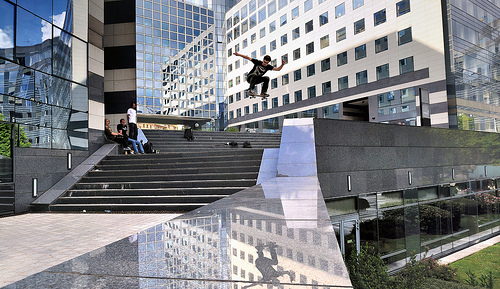

In [ ]:
image = ds[6753]['image']
image

In [ ]:
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

output = base_model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=False))

<s> USER: <image> 
Describe briefly ASSISTANT: The image captures a skateboarder performing a trick in mid-air, seemingly flying through the air while riding the skateboard. The skateboarder is the main focus of the scene, with the skateboard visible beneath him.

In the background, there are several people watching the skateboarder's performance. Some of them are standing closer to the skateboarder, while others are further away. The scene appears to be taking place in


In [ ]:
print(processor.decode(output[0][16:], skip_special_tokens=True))

The image captures a skateboarder performing a trick in mid-air, seemingly flying through the air while riding the skateboard. The skateboarder is the main focus of the scene, with the skateboard visible beneath him.

In the background, there are several people watching the skateboarder's performance. Some of them are standing closer to the skateboarder, while others are further away. The scene appears to be taking place in


In [ ]:
selected_indices = ds.select(range(len(ds)-50,len(ds)))
selected_indices

Dataset({
    features: ['image', 'text'],
    num_rows: 50
})

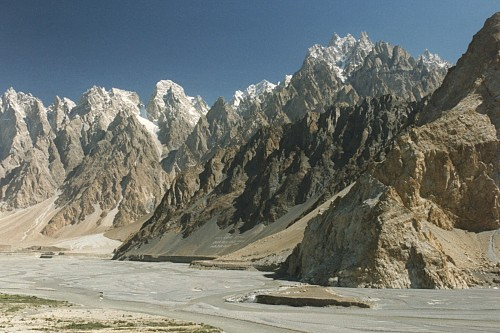

In [ ]:
selected_indices[0]['image']

In [ ]:
predictions = {}
references =  {}

for idx,sample in enumerate(selected_indices):
    image_id = f"image_{idx}"
    reference = sample['text']  # Gerçek açıklama
    image = sample['image']  # Görsel

    inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

    output = base_model.generate(**inputs, max_new_tokens=100)

    prediction = processor.decode(output[0][16:], skip_special_tokens=True)

    predictions[image_id]=[prediction]
    references[image_id]=[reference]

In [ ]:
predictions

{'image_0': ['The image features a breathtaking mountain range with snow-capped peaks. The mountains are situated in a desert-like environment, and the sky is a beautiful blue. The scene is a mix of natural beauty and rugged terrain, making it an ideal location for adventure seekers.'],
 'image_1': ["The image shows a group of people standing together, with some of them wearing colorful outfits. They are engaged in conversation and appear to be enjoying each other's company. There are a few handbags visible in the scene, suggesting that the group might be out for a casual gathering or event."],
 'image_2': ['The image features a small dog walking on a beach near the water. The dog is positioned in the center of the scene, and it appears to be enjoying its time on the sandy shore. The beach is a popular spot for people and their pets to relax and enjoy the outdoors.'],
 'image_3': ['The image features a woman wearing a pink tank top, holding a cup of coffee. She is surrounded by other p

In [ ]:
def calculate_metrics(references, candidates):
    bleu_scorer = Bleu(4)  # BLEU-1, BLEU-2, BLEU-3, BLEU-4
    bleu_score, _ = bleu_scorer.compute_score(references, candidates)

    cider_scorer = Cider()
    cider_score, _ = cider_scorer.compute_score(references, candidates)

    meteor_scorer = Meteor()
    meteor_score, _ = meteor_scorer.compute_score(references, candidates)

    rouge_scorer = Rouge()
    rouge_score, _ = rouge_scorer.compute_score(references, candidates)

    return {
        "BLEU": bleu_score,
        "CIDEr": cider_score,
        "METEOR": meteor_score,
        "ROUGE": rouge_score
    }

In [ ]:
scores = calculate_metrics(references, predictions)

print(f"BLEU Skorları: {scores['BLEU']}")
print(f"CIDEr Skoru: {scores['CIDEr']}")
print(f"METEOR Skoru: {scores['METEOR']}")
print(f"ROUGE Skoru: {scores['ROUGE']}")


{'testlen': 2816, 'reflen': 592, 'guess': [2816, 2766, 2716, 2666], 'correct': [237, 64, 16, 4]}
ratio: 4.756756756748722
BLEU Skorları: [0.08416193181815193, 0.04412876231191408, 0.022553359205369397, 0.011454031925134472]
CIDEr Skoru: 6.351202775389637e-07
METEOR Skoru: 0.15049313111998625
ROUGE Skoru: 0.1328992977782853


In [ ]:
config = PeftConfig.from_pretrained("beladrheinz/results")
model = PeftModel.from_pretrained(base_model, "beladrheinz/results")

adapter_config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/39.9M [00:00<?, ?B/s]

In [ ]:
model = model.merge_and_unload()

In [ ]:
inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=False))

<s> USER: <image> 
Describe briefly ASSISTANT: A man climbs a rock face . </s>


In [ ]:
predictions = {}
references =  {}

for idx,sample in enumerate(selected_indices):
    image_id = f"image_{idx}"
    reference = sample['text']  # Gerçek açıklama
    image = sample['image']  # Görsel

    inputs = processor(images=image, text=prompt, return_tensors='pt').to(device)

    output = model.generate(**inputs, max_new_tokens=100)

    prediction = processor.decode(output[0][16:], skip_special_tokens=True)

    predictions[image_id]=[prediction]
    references[image_id]=[reference]

In [ ]:
predictions

{'image_0': ['A mountain range with snow on the peaks . '],
 'image_1': ['A group of people are standing outside a bus . '],
 'image_2': ['A small brown and white dog is walking on the beach . '],
 'image_3': ['A woman in a pink tank top holds a cup of coffee . '],
 'image_4': ['A man in a yellow and red shirt is running down a road . '],
 'image_5': ['A man with blue and yellow paint on his face is kissing a boy . '],
 'image_6': ['A man rides a bike on a trail . '],
 'image_7': ['Two men sit in front of a large white monument . '],
 'image_8': ['A man stands next to a bicycle on a snowy road . '],
 'image_9': ['A man with a backpack and a bicycle stands on a dirt road . '],
 'image_10': ['A man is standing on a mountain with his bicycle . '],
 'image_11': ['A black dog and a brown dog are playing together in a yard . '],
 'image_12': ['A man is walking across a bridge . '],
 'image_13': ['A green tent is set up in a forest . '],
 'image_14': ['A young boy is playing in a muddy puddle

In [ ]:
scores = calculate_metrics(references, predictions)

print(f"BLEU Skorları: {scores['BLEU']}")
print(f"CIDEr Skoru: {scores['CIDEr']}")
print(f"METEOR Skoru: {scores['METEOR']}")
print(f"ROUGE Skoru: {scores['ROUGE']}")


{'testlen': 564, 'reflen': 592, 'guess': [564, 514, 464, 414], 'correct': [273, 94, 37, 13]}
ratio: 0.9527027027010935
BLEU Skorları: [0.46059882326430107, 0.283115352091439, 0.18253659909097134, 0.11610690250604463]
CIDEr Skoru: 1.2646726167506066
METEOR Skoru: 0.2009119393930933
ROUGE Skoru: 0.43232393273163666


In [ ]:
references

{'image_0': ['A mountain landscape .'],
 'image_1': ['a group of four people conversing next to a bus'],
 'image_2': ['A Beagle dog is walking on the shoreline at the beach .'],
 'image_3': ['A female in a pink tank top drinking beer .'],
 'image_4': ['A runner in a yellow shirt is cresting a hill .'],
 'image_5': ["A boy licks an older male 's face that 's covered in a blue and yellow creamy substance ."],
 'image_6': ['A guy is riding a bike up the side of a hill .'],
 'image_7': ['A couple of men sit by a large stone slab with mountains in the background .'],
 'image_8': ['There are two men riding bicycles outside in the snow covered countryside .'],
 'image_9': ['a biker bikes in the mountains .'],
 'image_10': ['A man on a bike nest to a river .'],
 'image_11': ['A brown dog and a black dog run into each other in the grass .'],
 'image_12': ['A hiker navigates a rope and wood bridge over a large dry ravine .'],
 'image_13': ['A large tent with a green cover at a campground .'],
 '